In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Lattice graph in networkx

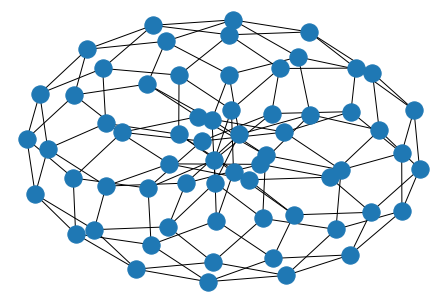

In [2]:
# 2d lattice graph
L = 8
G = nx.grid_2d_graph(L,L, periodic=True)

# plot
nx.draw(G)

In [3]:
# all nodes have degree 4
nx.degree_histogram(G)

[0, 0, 0, 0, 64]

In [17]:
'''
    Lattice sites are enumerated (row, column) starting on
    upper left with (0,0) ending on lower right with (7,7).
'''
# example: neighbours of node (0,0) and (1,1)
print(list(nx.neighbors(G, (0,0))),'\t', list(nx.neighbors(G, (1,1))))

[(1, 0), (0, 1), (7, 0), (0, 7)] 	 [(0, 1), (2, 1), (1, 0), (1, 2)]


## Starting with random walks

#### Distance functions

In [147]:
def dist_1d(a, b, L):
    '''
    Distance between two points on a periodic 
    line with length L.
    
    Arguments:
    - a: first point (integer 0,..,L-1)
    - b: second point (integer 0,...,L-1)
    - L: number of points on line
    
    Return:
    - d: distance between points
    '''
    # handle usage of bad arguments
    if a>=L or b>=L or a<0 or b<0:
        print('INFO: \na={} or b={} should be in range [0,L-1]=[0,{}]. Using a%L={} or b%L={} instead.\n'.format(a, b, L, a%L, b%L))
        a = a%L
        b = b%L
    if type(a) != int or type(b) != int or type(L) != int:
        print('INFO: \nAll arguments should be type int. You used type(a)={}, type(b)={}, type(L)={}. \nWill be converted using int(..).\n'.format(type(a), type(b), type(L)))
        a, b, L = int(a), int(b), int(L)
        
    # return distance
    d = 0
    if abs(a-b)<L/2.:
        d = abs(a-b)
    else :
        d = L-abs(a-b)
    return d


def dist_2d_lattice(u, v, L):
    '''
    Distance between two node on a periodic 
    lattice graph with side length L.
    
    Arguments:
    - u: first node (tuple (u_0, u_1))
    - v: second node (tuple (v_0, v_1))
    - L: side length of lattice
    
    Return:
    - d: distance between points (-1 if error occured)
    '''
    # handle arguments having wrong types
    if type(u)!=tuple or type(v)!= tuple:
        print('ERROR: \nArguments u and v should be type tuple. You used type(u)={}, type(v)={}. \nBreak and return -1\n'.format(type(u), type(v)))
        return -1
    if type(L)!=int:
        print('INFO: \nArgument L should be type int. You used type(L)={}. Now using int(L)={}\n'.format(type(L), int(L)))
        L=int(L)
    
    d = dist_1d(u[0], v[0], L) + dist_1d(u[1], v[1], L)
    return d

#### Checking our 2d lattice distance and nx.shortest_path_length() algorithm for similar results

In [146]:
u = (0,0)
v = (4,4)
# compare measures

print('Distance between nodes u={}, v={} on 2d lattice graph G with side length L={}'.format(u, v, L),
      '\n\nUsing dist_2d_lattice():', dist_2d_lattice(u,v,L),
      '\nUsing nx.shortest_path_length() on G:', nx.shortest_path_length(G, source=u, target=v))

Distance between nodes u=(0, 0), v=(4, 4) on 2d lattice graph G with side length L=8 

Using dist_2d_lattice(): 8 
Using nx.shortest_path_length() on G: 8


2